<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Рекомендация тарифов

**Цель**
* Построить модель классификации на предобработанных данных для предсказания тарифа.

**Метрика**
* Метрика оценки качества модели `accuracy`, которая должна быть не ниже 0.75 на тестовой выборке.


**Описание данных**

* В таблице представлена информация о поведении пользователей **за месяц** (1 строка - 1 клиент).

**Features**:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб.

**Target**
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).


## Знакомство с данными

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Попросим не показывать предупреждения
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Откроём таблицу
users = pd.read_csv('/datasets/users_behavior.csv')
users.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [44]:
#Объем таблицы
users.shape

(3214, 5)

In [45]:
#Информация о форматах и пропусках
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


* Пропусков в данных нет
* Все форматы адекватны

In [46]:
#Поиск дубликатов
users.duplicated().sum()

0

In [47]:
# Уникальные значения в колонке тарифа
users['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

* Колонка `is_ultra` содержит информацию о двух классах, где почти 70% данных относятся к информации пользователей тарифа `smart`.

### Вывод

* Данные загружены адекватно. 
* Пропусков и дубликатов нет. 
* Форматы верные.
* В колонке `is_ultra` два уникальных значения. Значит необходимо провести бинарную классификацию данных. 


## Подготовка данных к обучению

* Объем данных 3214 строк, что позволяет построить модель классификации, которая предскажет выбор тарифа по 4-м признакам:
`calls`,	`minutes`,	`messages`,	`mb_used`.
* Укажем для будущей модели целевой признак `target` и признаки для предсказания `features`.

In [48]:
target = users['is_ultra'] # целевой признак
features = users.drop(['is_ultra'], axis=1) # признаки для предсказания модели

* Разделим исходные данные на обучающую (60%), валидационную (20%) и тестовую (20%) выборки.

In [49]:
#Выделим сначала 40% на валидационную и тестовую выборки.
features_train, features_rem, target_train, target_rem = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [50]:
# разделим оставшиеся 40% данных пополам для вадидационной и тестовой выборок
features_valid, features_test, target_valid, target_test = train_test_split(
features_rem, target_rem, test_size = 0.5, random_state = 12345)

In [51]:
print('объем обучающей выборки:', features_train.shape) 
print('доля обучающей выборки:', round(features_train.shape[0]/users.shape[0], 1)*100,'%')
print('объем валидационной выборки:', features_valid.shape) 
print('объем тестовой выборки:', features_test.shape)

объем обучающей выборки: (1928, 4)
доля обучающей выборки: 60.0 %
объем валидационной выборки: (643, 4)
объем тестовой выборки: (643, 4)


### Вывод

**Данные разделены на следующие выборки**:
* обучающую (60%) - `features_train`,`target_train`,
* валидационную (20%) - `features_valid`, `target_valid`
* тестовую (20%) - `features_test`, `target_test`.

## Обучение моделей

### DecisionTreeClassifier

* Обучим модель `DecisionTreeClassifier` на обучающей выборке, а точность проверим на валидационной выборке.
* Так как эта модель быстро переобучается, то не будем выставлять глубину дерева больше 5.

In [52]:
best_criterion = None
best_model = None
best_result = 0 # нулевое accuracy_score качество модели
best_depth = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1, 6):
        model = DecisionTreeClassifier(criterion=criterion, random_state=12345, 
                                           max_depth=depth) # создадим пустую модель
        model.fit(features_train, target_train) # обучим модель
        predictions_valid = model.predict(features_valid) # получим предсказание модели по валидационной выборке
        results = accuracy_score(target_valid, predictions_valid) # результат оценки предсказания
        if results > best_result:
            best_criterion = criterion
            best_model = model
            best_result = results
            best_depth = depth
                    
print('Accuracy лучшей модели:', round(best_result, 4), 
      'Глубина дерева:', depth, 'Лучший критерий:', criterion)     

Accuracy лучшей модели: 0.7854 Глубина дерева: 5 Лучший критерий: entropy


* Теперь установим дополнительный параметр `min_samples_split` до 5

In [53]:
best_criterion = None
best_model = None
best_result = 0 # нулевое accuracy_score качество модели
best_depth = 0
best_min_samples_split = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1, 6):
        for min_samples_split in range(2,6,1):
            model = DecisionTreeClassifier(criterion=criterion, random_state=12345, 
                                           max_depth=depth, 
                                           min_samples_split=min_samples_split) # создадим пустую модель
            model.fit(features_train, target_train) # обучим модель
            predictions_valid = model.predict(features_valid) # получим предсказание модели по валидационной выборке
            results = accuracy_score(target_valid, predictions_valid) # результат оценки предсказания
            if results > best_result:
                best_criterion = criterion
                best_model = model
                best_result = results
                best_depth = depth
                best_min_samples_split = min_samples_split
            
print('Accuracy_score лучшей модели:', round(best_result, 4), 
      'Глубина дерева:', depth, 
      'Минимальное количество примеров для разделения:', min_samples_split,
     'Лучший критерий:', criterion)     

Accuracy_score лучшей модели: 0.7854 Глубина дерева: 5 Минимальное количество примеров для разделения: 5 Лучший критерий: entropy


* Особой разницы не было показано и уровень Accuracy_score остался на предыдушем уровне.
* Используем дополнительный уравновешивающий параметр `min_samples_leaf` до 5.

In [54]:
best_criterion = None
best_model = None
best_result = 0 # нулевое accuracy_score качество модели
best_depth = 0
best_min_samples_split = 0
best_min_samples_leaf = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1, 6):
        for min_samples_split in range(2,6, 1):
            for min_samples_leaf in range(1,6,1):
                model = DecisionTreeClassifier(criterion=criterion, random_state=12345, 
                                           max_depth=depth, 
                                           min_samples_split=min_samples_split, 
                                           min_samples_leaf = min_samples_leaf) # создадим пустую модель
                model.fit(features_train, target_train) # обучим модель
                predictions_valid = model.predict(features_valid) # получим предсказание модели по валидационной выборке
                results = accuracy_score(target_valid, predictions_valid) # результат оценки предсказания
                if results > best_result:
                    best_criterion = criterion
                    best_model = model
                    best_result = results
                    best_depth = depth
                    best_min_samples_split = min_samples_split
                    best_min_samples_leaf = min_samples_leaf
print('Accuracy_score лучшей модели:', round(best_result, 4), 
      'Глубина дерева:', depth, 
      'Минимальное количество примеров для разделения:', min_samples_split, 
     'Минимальное количество объектов в листе:', min_samples_leaf,
     'Лучший критерий:', criterion)     

Accuracy_score лучшей модели: 0.7854 Глубина дерева: 5 Минимальное количество примеров для разделения: 5 Минимальное количество объектов в листе: 5 Лучший критерий: entropy


* Accuracy_score вырос с 0.764 до 0.7667. Значит будем использовать модель с выявленными гиперпараметрами.

In [55]:
# Построим модель DecisionTreeClassifier с выбранными в цикле лучшими параметрами
model1 = DecisionTreeClassifier(criterion='entropy',
                                max_depth=5, 
                                min_samples_split=5, 
                                min_samples_leaf=5,
                               random_state=12345)

model1.fit(features_train, target_train) # обучим модель
predictions_valid = model1.predict(features_valid)
result1 = model1.score(features_valid, target_valid)
print(result1)


0.7807153965785381


* Уровень accuracy для модели 0.78
* Построим матрицу ошибок для этой `model1`.

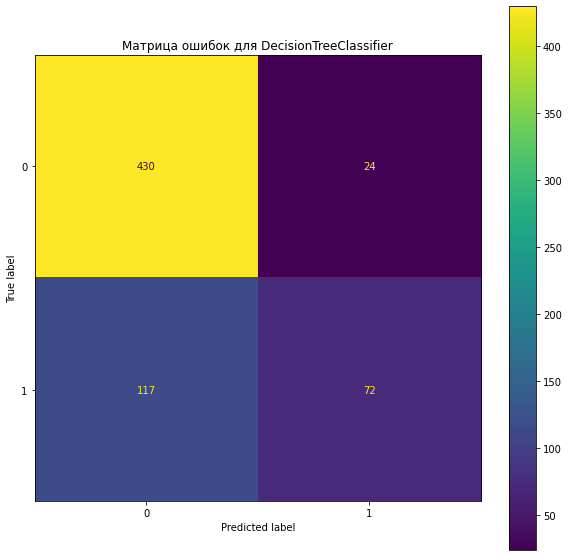

In [56]:
#Построим матрицу ошибок для модели 1

cm1 = confusion_matrix(target_valid, predictions_valid, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                           display_labels=model1.classes_)
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Матрица ошибок для DecisionTreeClassifier')
disp.plot(ax=ax)
plt.show()


* Истинно позитивных и истинно негативных больше, чем ложно-положительных и ложно-отрицательных.
* Однако видно, что есть много ошибок.
* Посмотрим на искомый уровень precision score

In [57]:
#Посмотрим отдельно на все показатели оценки точности модели
print(metrics.classification_report(target_valid, predictions_valid, labels=model1.classes_))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       454
           1       0.75      0.38      0.51       189

    accuracy                           0.78       643
   macro avg       0.77      0.66      0.68       643
weighted avg       0.78      0.78      0.76       643



* Матрица ошибок и таблица точности показывают, что для пользователей `Ультра`, обозначенных, как 1, ошибка предсказания выше, чем для пользователей тарифа `Смарт`.

### Вывод
* Видно, что только часть значений предсказна верно, есть ошибки.
* Accuracy лучшей модели: 0.7854, Precision:  0.7667, Глубина дерева: 5
* Precision для тарифа `Ультра` 0.75 (для тарифа `Смарт` - 0.79)

### RandomForestClassifier

* Обучим модель `RandomForestClassifier` на обучающей выборке, а точность проверим на валидационной выборке.
* Так как этот алгоритм не так быстро переобучается, то установим количество деревьев 50, а глубину деревьев 10.

In [59]:
best_criterion = None
best_model = None
best_result = 0 # нулевое accuracy_score качество модели
best_depth = 0
best_est = 0
for criterion in ['gini', 'entropy']:
    for est in range(10, 51, 10):
        for depth in range(1, 11):
            model = RandomForestClassifier(criterion=criterion, random_state=12345, n_estimators=est, max_depth=depth)
            model.fit(features_train, target_train)
            result = model.score(features_valid, target_valid)
            if result> best_result:
                best_model = model
                best_result = result
                best_est = est
                best_depth = depth
                best_criterion = criterion
print('Accuracy наилучшей модели на валидационной выборке:', best_result, 
      'Количество деревьев', est, 'Глубина дерева:', depth,
     'Лучший критерий', criterion)            

Accuracy наилучшей модели на валидационной выборке: 0.8087091757387247 Количество деревьев 50 Глубина дерева: 10 Лучший критерий entropy


* Проверим теперь модель при количестве дереьвев 500

In [60]:
best_criterion = None
best_model = None
best_result = 0 # нулевое accuracy_score качество модели
best_depth = 0
for criterion in ['gini', 'entropy']:
    for depth in range(1, 11):
        model = RandomForestClassifier(criterion=criterion, random_state=12345, n_estimators=500, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        if result> best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_criterion = criterion
print('Accuracy наилучшей модели на валидационной выборке:', best_result, 
      'Количество деревьев', est, 'Глубина дерева:', depth,
     'Лучший критерий', criterion)            

Accuracy наилучшей модели на валидационной выборке: 0.8040435458786936 Количество деревьев 50 Глубина дерева: 10 Лучший критерий entropy


* Уровень accuracy даже немного сократился при увеличение количества деревьев с 50 и 500.
* Попробуем установить остановится с 50 деревьями, но добавим уравновешивающий гиперапараметр `min_samples_split` до 5.

In [61]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_min_samples_split = 0

for criterion in ['gini', 'entropy']:
    for est in range(10, 51, 10):
        for depth in range(1, 11):
            for min_samples_split in range(2,6, 1):
                model = RandomForestClassifier(criterion=criterion, 
                                           random_state=12345,
                                           n_estimators=est, 
                                           max_depth=depth, min_samples_split= min_samples_split)
                model.fit(features_train, target_train)
                result = model.score(features_valid, target_valid)
                if result> best_result:
                    best_model = model
                    best_result = result
                    best_est = est
                    best_depth = depth
                    best_min_samples_split = min_samples_split
print('Accuracy наилучшей модели на валидационной выборке:', best_result, 
      'Количество деревьев', est, 'Глубина дерева:', depth,
     'Минимальное количество примеров для разделения', min_samples_split, 
     'Лучший критерий:', criterion)            

Accuracy наилучшей модели на валидационной выборке: 0.8102643856920684 Количество деревьев 50 Глубина дерева: 10 Минимальное количество примеров для разделения 5 Лучший критерий: entropy


* Уровень точности возрос до 0.81.
* Добавим ещё один уравновешивающий гиперапараметр `min_samples_leaf` до 5.

In [62]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
best_min_samples_split = 0
best_min_samples_leaf = 0

for criterion in ['gini', 'entropy']:
    for est in range(10, 51, 10):
        for depth in range(1, 11):
            for min_samples_split in range(2,6, 1):
                for min_samples_leaf in range(1,6,1):
                    model = RandomForestClassifier(criterion=criterion, 
                                           random_state=12345,
                                           n_estimators=est, 
                                           max_depth=depth, 
                                         min_samples_split= min_samples_split,
                                              min_samples_leaf = min_samples_leaf)
                    model.fit(features_train, target_train)
                    result = model.score(features_valid, target_valid)
                    if result> best_result:
                        best_model = model
                        best_result = result
                        best_est = est
                        best_depth = depth
                        best_min_samples_split = min_samples_split
                        best_min_samples_leaf = min_samples_leaf
print('Accuracy наилучшей модели на валидационной выборке:', best_result, 
      'Количество деревьев', est, 'Глубина дерева:', depth,
     'Минимальное количество примеров для разделения', min_samples_split,
     'Минимальное количество объектов в листе:', min_samples_leaf,
     'Лучший критерий:', criterion)            

Accuracy наилучшей модели на валидационной выборке: 0.8102643856920684 Количество деревьев 50 Глубина дерева: 10 Минимальное количество примеров для разделения 5 Минимальное количество объектов в листе: 5 Лучший критерий: entropy


* Скорость вычисления явно слишком медленная. Поэтому несмотря на более высокую точность модели - лучше отказаться от этой модели.
* Построим модель с лучшими гиперпараметрами: Количество деревьев 50 Глубина дерева: 10 Минимальное количество примеров для разделения 5 Лучший критерий: entropy

In [64]:
#Построим модель с выбранными в цикле параметрами entropy
model2 = RandomForestClassifier(criterion='entropy',
                                random_state=12345, 
                                n_estimators=50, 
                                max_depth=10, 
                                min_samples_split=5
                               )
model2.fit(features_train, target_train)
predictions_valid2 = model2.predict(features_valid)
result2 = model2.score(features_valid, target_valid)
print(result)

0.8009331259720062


* Построим матрицу ошибок для модели `model2`

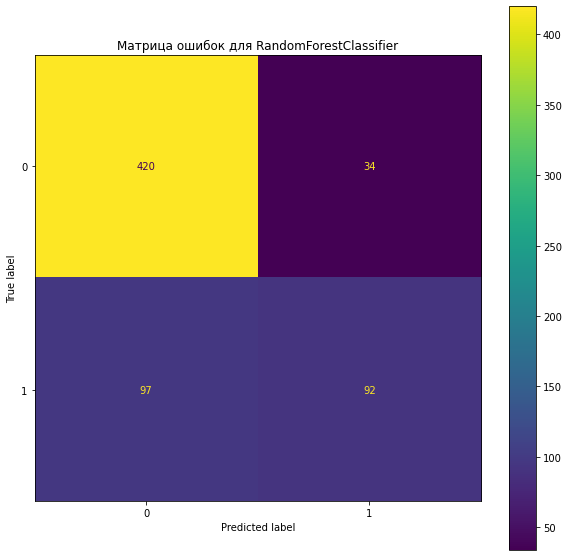

In [65]:
#Построим матрицу ошибок для модели 2
cm2 = confusion_matrix(target_valid, predictions_valid2, labels=model2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                           display_labels=model2.classes_)
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Матрица ошибок для RandomForestClassifier')
disp2.plot(ax=ax)
plt.show()

* Истинно позитивных и истинно негативных больше, чем ложно-положительных и ложно-отрицательных.
* Количество правильных ответов для тарифа `Ультра` возросло.
* Посмотрим на искомый уровень precision score

In [66]:
#Посмотрим отдельно на все показатели оценки точности модели 2
print(metrics.classification_report(target_valid, predictions_valid2, labels=model2.classes_))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       454
           1       0.73      0.49      0.58       189

    accuracy                           0.80       643
   macro avg       0.77      0.71      0.72       643
weighted avg       0.79      0.80      0.78       643



### Вывод
* Оптимальное количество деревьев 50, глубина дерева 10. Критерий `entropy` показал себя лучше, чем `gini`

*  Accuracy `model2` составило 0.80, что выше, чем дерева решений `model1`.

* Однако `precision model2` для тарифа `Ультра` оказался ниже, чем для для дерева решений `model1`.

### LogisticRegression

* Построим логистическую регрессионную модель с гиперараметрами по умолчанию

In [67]:
model_lg_0=LogisticRegression(random_state=12345)
model_lg_0.fit(features_train, target_train)
predictions_valid3 = model_lg_0.predict_proba(features_valid)
result_lg0 = model_lg_0.score(features_valid, target_valid)
print("Accuracy модели логистической регрессии на валидационной выборке:", result_lg0)

Accuracy модели логистической регрессии на валидационной выборке: 0.7107309486780715


In [68]:
#Построим логистическую регрессионную модель с penalty='none'
model_lg_1 = LogisticRegression(random_state=12345, penalty='none')
model_lg_1.fit(features_train, target_train)
predictions_valid_lr1 = model_lg_1.predict_proba(features_valid)
result_lg1 = model_lg_1.score(features_valid, target_valid)
print("Accuracy модели логистической регрессии на валидационной выборке:", result_lg1)                       

Accuracy модели логистической регрессии на валидационной выборке: 0.7558320373250389


* Уровень точности выше для модели выше с параметром 'none' и состовляет 0.7558.

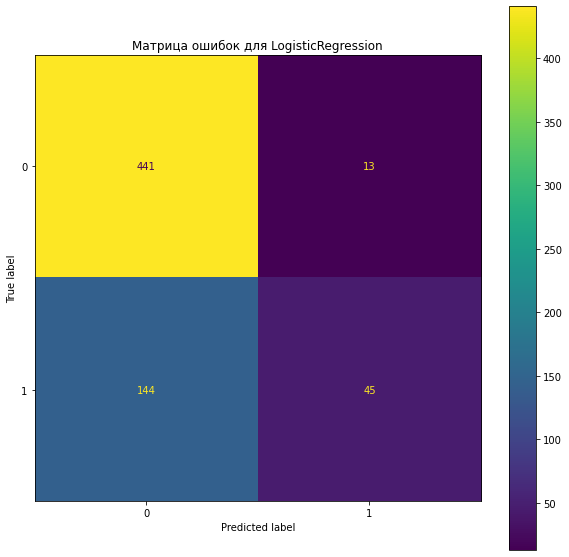

In [69]:
#Построим матрицу ошибок для модели model_lg_1
cm3 = confusion_matrix(target_valid, model_lg_1.predict(features_valid))
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                           )
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Матрица ошибок для LogisticRegression')
disp3.plot(ax=ax)
plt.show()

In [70]:
#Посмотрим отдельно на все показатели оценки точности модели3
print(metrics.classification_report(target_valid, model_lg_1.predict(features_valid)))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       454
           1       0.78      0.24      0.36       189

    accuracy                           0.76       643
   macro avg       0.76      0.60      0.61       643
weighted avg       0.76      0.76      0.71       643



### Вывод
* Точность модели логистической регрессии составила 0.76.

* Precision для тарифа `Ультра` 0.78, что выше предыдущих моделей. Однако для тарифа `Смарт` уровень точности ниже предыдуших моделей и составил всего 0.75.
* Оценки очень похоже на модель1 (решающее дерево).

* Самые высокие оценки точности были получены для модели2 Случайного дерева.

## Тестирование модели

In [72]:
# получим предсказания модели2 на тестовой выборке
predictions_test2 = model2.predict(features_test)
results_test2 = accuracy_score(target_test, predictions_test2)
print("Accuracy модели Случайных деревьев на тестовой выборке:", results_test2)
print()
#Посмотрим отдельно на все показатели оценки точности модели
print(metrics.classification_report(target_test, predictions_test2, labels=model2.classes_))

Accuracy модели Случайных деревьев на тестовой выборке: 0.8009331259720062

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       440
           1       0.75      0.55      0.64       203

    accuracy                           0.80       643
   macro avg       0.78      0.73      0.75       643
weighted avg       0.80      0.80      0.79       643



* Уровень accuracy составил 0.80, в то время как уровень precision составил 0.82 и 0.75. 

**Sanity check**

* Для проведения `sanity check` сравним работу нашей модели со случайной (`DummyClassifier`). 

In [37]:
#Проверим accuracy на тестовой выборке для всех стратегий DummyClassifier
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(features_test, target_test)
    print(f'Accuracy для:{strategy}:', dummy.score(features_test, target_test))

Accuracy для:stratified: 0.5754276827371695
Accuracy для:most_frequent: 0.6842923794712286
Accuracy для:prior: 0.6842923794712286
Accuracy для:uniform: 0.5194401244167963


### Вывод
* Точность оценок была проверена как на тестовой выборке (модель сохранила уровень точности), так и при сравнении со случайной выборкой.

## Общий вывод
* Точность предсказания (`accuracy`) тарифа клиента при помощи модели `RandomForestClassifier` составила 0.80.